# **Preparation**

In [2]:
## Loading the requisite libraries ##

import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from fancyimpute import KNN

## Loading the libraries required for plotting ##

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [3]:
## Loading the libraries for model development operations ##

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [4]:
## Setting the working directory ##

os.chdir("F:/Python/Dir")

In [6]:
## Checking the working directory ##

os.getcwd()

'F:\\Python\\Dir'

# **Data Acquisition and Exploration**

In [5]:
## Loading the provided data file ##

data_record = pd.read_excel("Absenteeism_at_work_Project.xls")

In [559]:
## Checking the dimensions of the data ##

data_record.shape

(740, 21)

In [560]:
## Having a glance at the data ##

data_record.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [58]:
## Learning more about the data ##

data_record.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
## Renaming columns for ease ##

data_record.rename(columns = {'Reason for absence':'ReasonForAbsence',
                             'Month of absence':'MonthOfAbsence', 
                             'Day of the week':'DayOfWeek',
                             'Transportation expense':'TransportationExpense', 
                             'Distance from Residence to Work':'DistanceFromResidence',
                             'Service time':'ServiceTime',
                             'Work load Average/day ':'WorkloadAverage',
                             'Hit target':'HitTarget',
                             'Disciplinary failure':'DisciplinaryFailure',
                             'Social drinker':'SocialDrinker',
                             'Social smoker':'SocialSmoker',
                             'Body mass index':'BodyMassIndex',
                             'Absenteeism time in hours':'AbsenteeismTimeInHours'}, inplace=True)

In [562]:
## Learning more about the data - continued ##

data_record.dtypes

ID                          int64
ReasonForAbsence          float64
MonthOfAbsence            float64
DayOfWeek                   int64
Seasons                     int64
TransportationExpense     float64
DistanceFromResidence     float64
ServiceTime               float64
Age                       float64
WorkloadAverage           float64
HitTarget                 float64
DisciplinaryFailure       float64
Education                 float64
Son                       float64
SocialDrinker             float64
SocialSmoker              float64
Pet                       float64
Weight                    float64
Height                    float64
BodyMassIndex             float64
AbsenteeismTimeInHours    float64
dtype: object

In [61]:
## Learning more about the data - continued ##

data_record.nunique()

ID                        36
ReasonForAbsence          28
MonthOfAbsence            13
DayOfWeek                  5
Seasons                    4
TransportationExpense     24
DistanceFromResidence     25
ServiceTime               18
Age                       22
WorkloadAverage           38
HitTarget                 13
DisciplinaryFailure        2
Education                  4
Son                        5
SocialDrinker              2
SocialSmoker               2
Pet                        6
Weight                    26
Height                    14
BodyMassIndex             17
AbsenteeismTimeInHours    19
dtype: int64

In [7]:
## Creating lists of continuous and categorical variables ##

contin_var = ['TransportationExpense','DistanceFromResidence','ServiceTime','Age','WorkloadAverage','HitTarget','Weight',
              'Height','BodyMassIndex','AbsenteeismTimeInHours']
categor_var = ['ID','ReasonForAbsence','MonthOfAbsence','DayOfWeek','Seasons','DisciplinaryFailure','Education','Son',
               'SocialDrinker','SocialSmoker','Pet']

# **Data Manipulation**

In [8]:
## Removing the observations where Absenteeism Time In Hours is zero ##
## As there is no point in considering cases where the employee wasn't absent ##

data_record = data_record.loc[data_record['AbsenteeismTimeInHours'] != 0,:]

In [565]:
## Checking the new dimensions of the data ##

data_record.shape

(704, 21)

# **Missing Value Analysis**

In [9]:
## Checking for missing values in all the columns ##

data_record.isnull().sum()

ID                         0
ReasonForAbsence           3
MonthOfAbsence             1
DayOfWeek                  0
Seasons                    0
TransportationExpense      7
DistanceFromResidence      3
ServiceTime                3
Age                        3
WorkloadAverage           10
HitTarget                  6
DisciplinaryFailure        6
Education                 10
Son                        6
SocialDrinker              3
SocialSmoker               4
Pet                        2
Weight                     1
Height                    13
BodyMassIndex             29
AbsenteeismTimeInHours    22
dtype: int64

In [ ]:
#Creating dataframe to store the percentage info of missing data ##

missingValues = pd.DataFrame(data_record.isnull().sum())

In [ ]:
#Resetting the index of the dataframe ##

missingValues = missingValues.reset_index(

In [ ]:
#Renaming the variables of the dataframe ##

missingValues = missingValues.rename(columns = {'index': 'Variables', 0: 'MissingPercentage'})

In [ ]:
#Calculating percentage info on the missing data in each column ##

missingValues['MissingPercentage'] = (missingValues['MissingPercentage']/len(data_record))*100

In [ ]:
#Arranging the rows in descending order ##

missingValues = missingValues.sort_values('MissingPercentage', ascending = False).reset_index(drop = True)

In [ ]:
#Saving the resultant dataset into a Comma Separated Values file ##

missingValues.to_csv("Missing Percentage Data.csv", inex = False)

In [66]:
## Creating a copy of the dataset to run operations for figuring out the proper imputation method ##

data_copy = data_record.copy()

In [67]:
## Taking a look at the copied dataset ##

data_copy.head(10)

,ID,ReasonForAbsence,MonthOfAbsence,DayOfWeek,Seasons,TransportationExpense,DistanceFromResidence,ServiceTime,Age,WorkloadAverage,...,DisciplinaryFailure,Education,Son,SocialDrinker,SocialSmoker,Pet,Weight,Height,BodyMassIndex,AbsenteeismTimeInHours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0
10,20,1.0,7.0,2,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,8.0


In [71]:
## Creating a known missing value to configure the proper imputation method ##
## Choosing the 8th observation in the column 'TransportationExpense' to be the missing value ##

data_copy['TransportationExpense'].loc[8]

nan

In [70]:
## Original value of the observation = 155.0 ##
## Changing the value to NaN

data_copy['TransportationExpense'].loc[8] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [72]:
## Imputing with mean ##

data_copy['TransportationExpense'].loc[8] = data_copy['TransportationExpense'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [73]:
## Checking the imputed value ##

data_copy['TransportationExpense'].loc[8]

219.7155172413793

In [75]:
## Changing the value to NaN again

data_copy['TransportationExpense'].loc[8] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [76]:
## Imputing with median ##

data_copy['TransportationExpense'].loc[8] = data_copy['TransportationExpense'].median()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [79]:
## Checking the imputed value ##

data_copy['TransportationExpense'].loc[8]

nan

In [78]:
## Changing the value to NaN again ##

data_copy['TransportationExpense'].loc[8] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [80]:
## Imputing using the k-nearest neighbours method ##

data_copy = pd.DataFrame(KNN(k=3).fit_transform(data_copy), columns = data_copy.columns)

Imputing row 1/704 with 0 missing, elapsed time: 0.208
Imputing row 101/704 with 1 missing, elapsed time: 0.208
Imputing row 201/704 with 0 missing, elapsed time: 0.216
Imputing row 301/704 with 0 missing, elapsed time: 0.216
Imputing row 401/704 with 0 missing, elapsed time: 0.216
Imputing row 501/704 with 0 missing, elapsed time: 0.216
Imputing row 601/704 with 0 missing, elapsed time: 0.216
Imputing row 701/704 with 0 missing, elapsed time: 0.216


In [83]:
## Checking the imputed value ##

data_copy['TransportationExpense'].loc[7]        ## Changing the index number since the imputation corrected the order index ##

153.3386895683553

In [ ]:
## Mean imputation gives value = 219.7 ##
## Median imputation gives value = 225.0 ##
## KNN imputation gives value = 155.3 ##

In [47]:
## Since we got the most accurate result with KNN (on the copied dataset), ##
## We will use the same to impute the missing values in the original dataset. ## 

In [10]:
## Imputing the missing values in the original dataset with KNN ##

data_record = pd.DataFrame(KNN(k=3).fit_transform(data_record), columns = data_record.columns)

Imputing row 1/704 with 0 missing, elapsed time: 0.872
Imputing row 101/704 with 1 missing, elapsed time: 0.961
Imputing row 201/704 with 0 missing, elapsed time: 0.965
Imputing row 301/704 with 0 missing, elapsed time: 0.968
Imputing row 401/704 with 0 missing, elapsed time: 0.971
Imputing row 501/704 with 0 missing, elapsed time: 0.973
Imputing row 601/704 with 0 missing, elapsed time: 0.975
Imputing row 701/704 with 0 missing, elapsed time: 0.976


In [11]:
## Rechecking for missing values in the dataset ##

data_record.isnull().sum()

ID                        0
ReasonForAbsence          0
MonthOfAbsence            0
DayOfWeek                 0
Seasons                   0
TransportationExpense     0
DistanceFromResidence     0
ServiceTime               0
Age                       0
WorkloadAverage           0
HitTarget                 0
DisciplinaryFailure       0
Education                 0
Son                       0
SocialDrinker             0
SocialSmoker              0
Pet                       0
Weight                    0
Height                    0
BodyMassIndex             0
AbsenteeismTimeInHours    0
dtype: int64

# **Outlier Analysis**

In [14]:
## Checking for outliers has to be done in the columns containing the continuous variables ##

contin_var

['TransportationExpense',
 'DistanceFromResidence',
 'ServiceTime',
 'Age',
 'WorkloadAverage',
 'HitTarget',
 'Weight',
 'Height',
 'BodyMassIndex',
 'AbsenteeismTimeInHours']

In [88]:
## Boxplot have to be created for 9 variables to perform outlier analysis ##
## Because the last continuous variable is the target variable ##

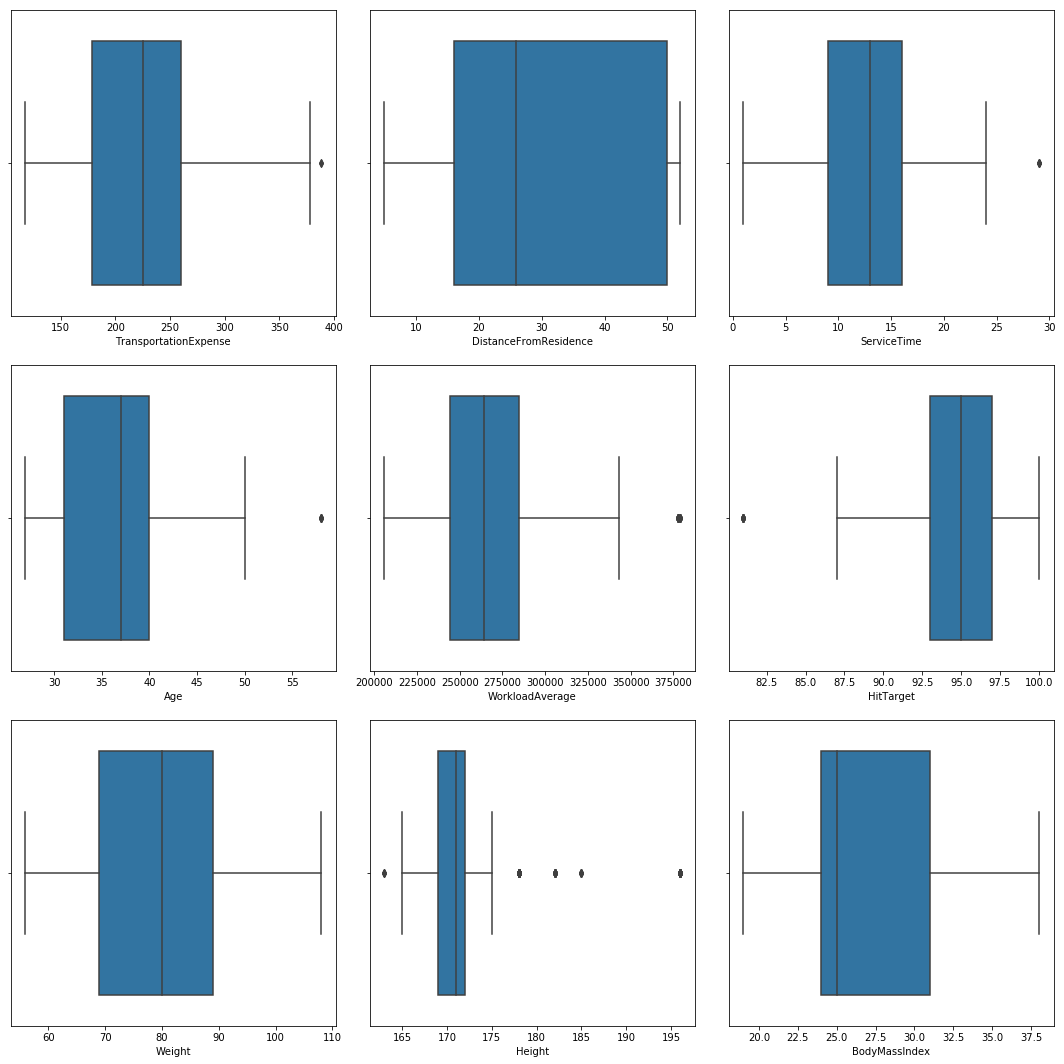

In [12]:
## Creating the set of boxplots for the continuous variables##

plt.figure(1)
plt.subplot(331)
sns.boxplot(data_record['TransportationExpense'])

plt.subplot(332)
sns.boxplot(data_record['DistanceFromResidence'])

plt.subplot(333)
sns.boxplot(data_record['ServiceTime'])

plt.subplot(334)
sns.boxplot(data_record['Age'])

plt.subplot(335)
sns.boxplot(data_record['WorkloadAverage'])

plt.subplot(336)
sns.boxplot(data_record['HitTarget'])

plt.subplot(337)
sns.boxplot(data_record['Weight'])

plt.subplot(338)
sns.boxplot(data_record['Height'])

plt.subplot(339)
sns.boxplot(data_record['BodyMassIndex'])

plt.figure(1).set_figheight(15)
plt.figure(1).set_figwidth(15)
plt.figure(1).tight_layout(pad = 1.5)

In [15]:
## Observing that outliers are present in the following continuous variables : ##
## TransportationExpense
## ServiceTime
## Age
## WorkloadAverage
## HitTarget
## Height

## Getting all the outliers into a single list for ease in processing ##

outlierList = ["TransportationExpense", "ServiceTime", "Age", "WorkloadAverage", "HitTarget", "Height"]

In [16]:
## Creating a simple loop to get the minimum and maximum of data in columns by using the intra-quartile range ##
## And using the min-max range to replace the outliers with NaN ##

for i in outlierList:
    quar75, quar25 = np.percentile(data_record.loc[:,i], [75,25])   ## Getting the quartile points
    intQuarRange = quar75 - quar25                                  ## Using the points to set intra-quartile range
    minimum = quar25 - (intQuarRange * 1.5)                         ## Setting the minimum
    maximum = quar75 + (intQuarRange * 1.5)                         ## Setting the maximum
    data_record.loc[data_record.loc[:,i] < minimum,i] = np.nan      ## Replacing the values lower than minimum with NaN
    data_record.loc[data_record.loc[:,i] > maximum,i] = np.nan      ## Replacing the values higher than maximum with NaN
    print('{con_var} -> {outlier_numbers}'.format(con_var = i, outlier_numbers = data_record.loc[:,i].isnull().sum()))

TransportationExpense -> 2
ServiceTime -> 5
Age -> 8
WorkloadAverage -> 28
HitTarget -> 15
Height -> 109


In [17]:
## Checking for missing values in the dataset ##

data_record.isnull().sum()

ID                          0
ReasonForAbsence            0
MonthOfAbsence              0
DayOfWeek                   0
Seasons                     0
TransportationExpense       2
DistanceFromResidence       0
ServiceTime                 5
Age                         8
WorkloadAverage            28
HitTarget                  15
DisciplinaryFailure         0
Education                   0
Son                         0
SocialDrinker               0
SocialSmoker                0
Pet                         0
Weight                      0
Height                    109
BodyMassIndex               0
AbsenteeismTimeInHours      0
dtype: int64

In [18]:
## Using KNN to impute the missing values created by removing the outliers ##

data_record = pd.DataFrame(KNN(k=3).fit_transform(data_record), columns = data_record.columns)

Imputing row 1/704 with 0 missing, elapsed time: 0.232
Imputing row 101/704 with 0 missing, elapsed time: 0.234
Imputing row 201/704 with 2 missing, elapsed time: 0.235
Imputing row 301/704 with 0 missing, elapsed time: 0.237
Imputing row 401/704 with 0 missing, elapsed time: 0.239
Imputing row 501/704 with 0 missing, elapsed time: 0.240
Imputing row 601/704 with 0 missing, elapsed time: 0.241
Imputing row 701/704 with 0 missing, elapsed time: 0.242


In [19]:
## Checking again for missing values in the dataset ##

data_record.isnull().sum()

ID                        0
ReasonForAbsence          0
MonthOfAbsence            0
DayOfWeek                 0
Seasons                   0
TransportationExpense     0
DistanceFromResidence     0
ServiceTime               0
Age                       0
WorkloadAverage           0
HitTarget                 0
DisciplinaryFailure       0
Education                 0
Son                       0
SocialDrinker             0
SocialSmoker              0
Pet                       0
Weight                    0
Height                    0
BodyMassIndex             0
AbsenteeismTimeInHours    0
dtype: int64

In [100]:
## Checking the metadata ##

data_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
ID                        704 non-null float64
ReasonForAbsence          704 non-null float64
MonthOfAbsence            704 non-null float64
DayOfWeek                 704 non-null float64
Seasons                   704 non-null float64
TransportationExpense     704 non-null float64
DistanceFromResidence     704 non-null float64
ServiceTime               704 non-null float64
Age                       704 non-null float64
WorkloadAverage           704 non-null float64
HitTarget                 704 non-null float64
DisciplinaryFailure       704 non-null float64
Education                 704 non-null float64
Son                       704 non-null float64
SocialDrinker             704 non-null float64
SocialSmoker              704 non-null float64
Pet                       704 non-null float64
Weight                    704 non-null float64
Height                    704 non-null float64
Bo

# **Data Analysis**

In [577]:
## Rounding off the dataset to maintain regularity among the imputed values of categorical variables ##

data_record = data_record.round(0)

In [29]:
## Creating a duplicate dataset at this point (to be used for Time Series operations) ##

absentData = data_record.copy()

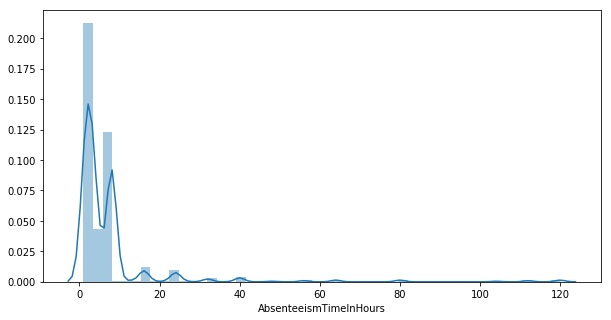

In [204]:
## Creating a distribution plot for the target variable ##

plt.figure(1)
sns.distplot(data_record['AbsenteeismTimeInHours'])

plt.figure(1).set_figheight(5)
plt.figure(1).set_figwidth(10)

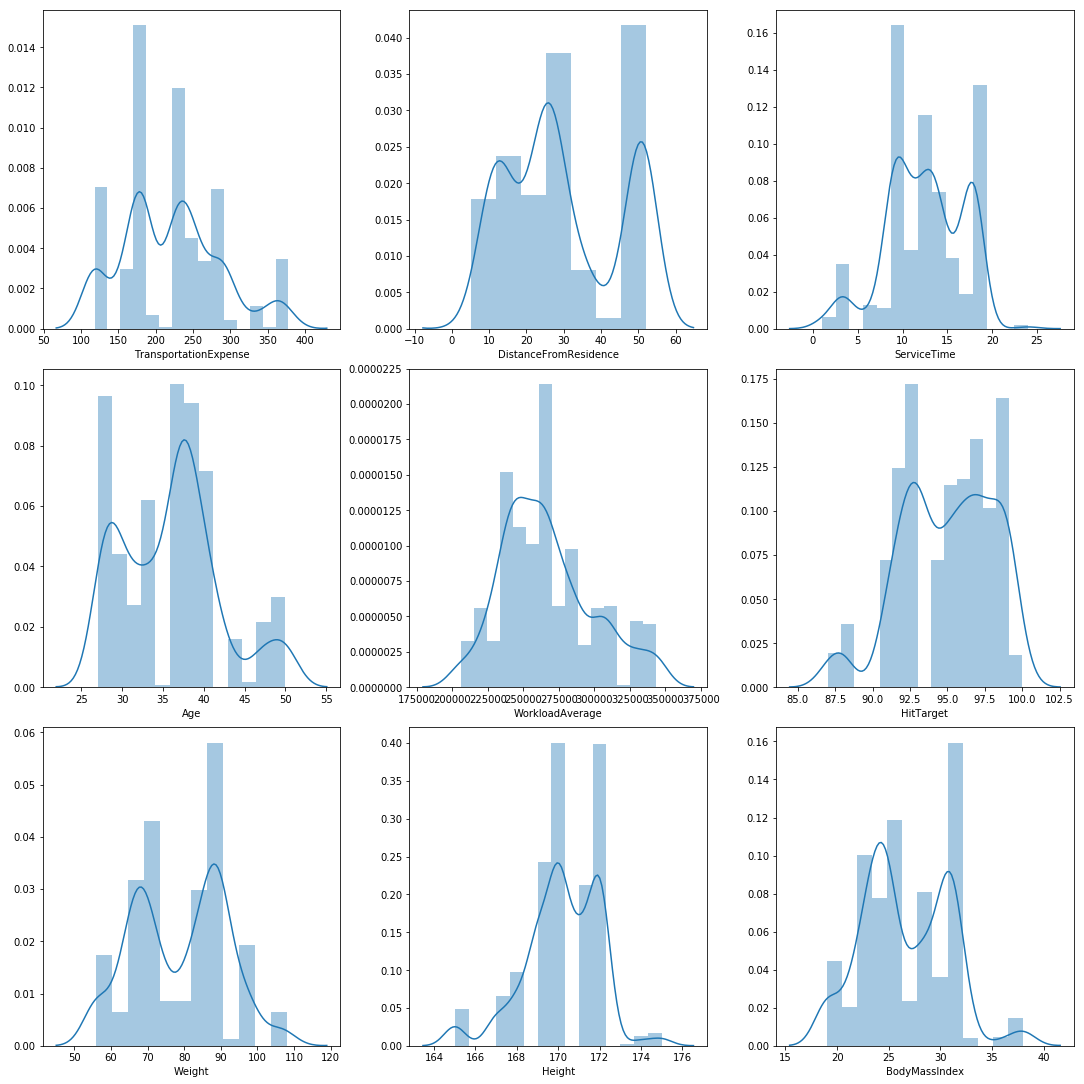

In [133]:
## Observation - The data is not normally distributed and skewed towards the left ##

## Creating distribution plots for the rest of the continuous variables

plt.figure(1)
plt.subplot(331,)
sns.distplot(data_record['TransportationExpense'])

plt.subplot(332)
sns.distplot(data_record['DistanceFromResidence'])

plt.subplot(333)
sns.distplot(data_record['ServiceTime'])

plt.subplot(334)
sns.distplot(data_record['Age'])

plt.subplot(335)
sns.distplot(data_record['WorkloadAverage'])

plt.subplot(336)
sns.distplot(data_record['HitTarget'])

plt.subplot(337)
sns.distplot(data_record['Weight'])

plt.subplot(338)
sns.distplot(data_record['Height'])

plt.subplot(339)
sns.distplot(data_record['BodyMassIndex'])

plt.figure(1).set_figheight(15)
plt.figure(1).set_figwidth(15)
plt.figure(1).tight_layout(pad = 0.5)

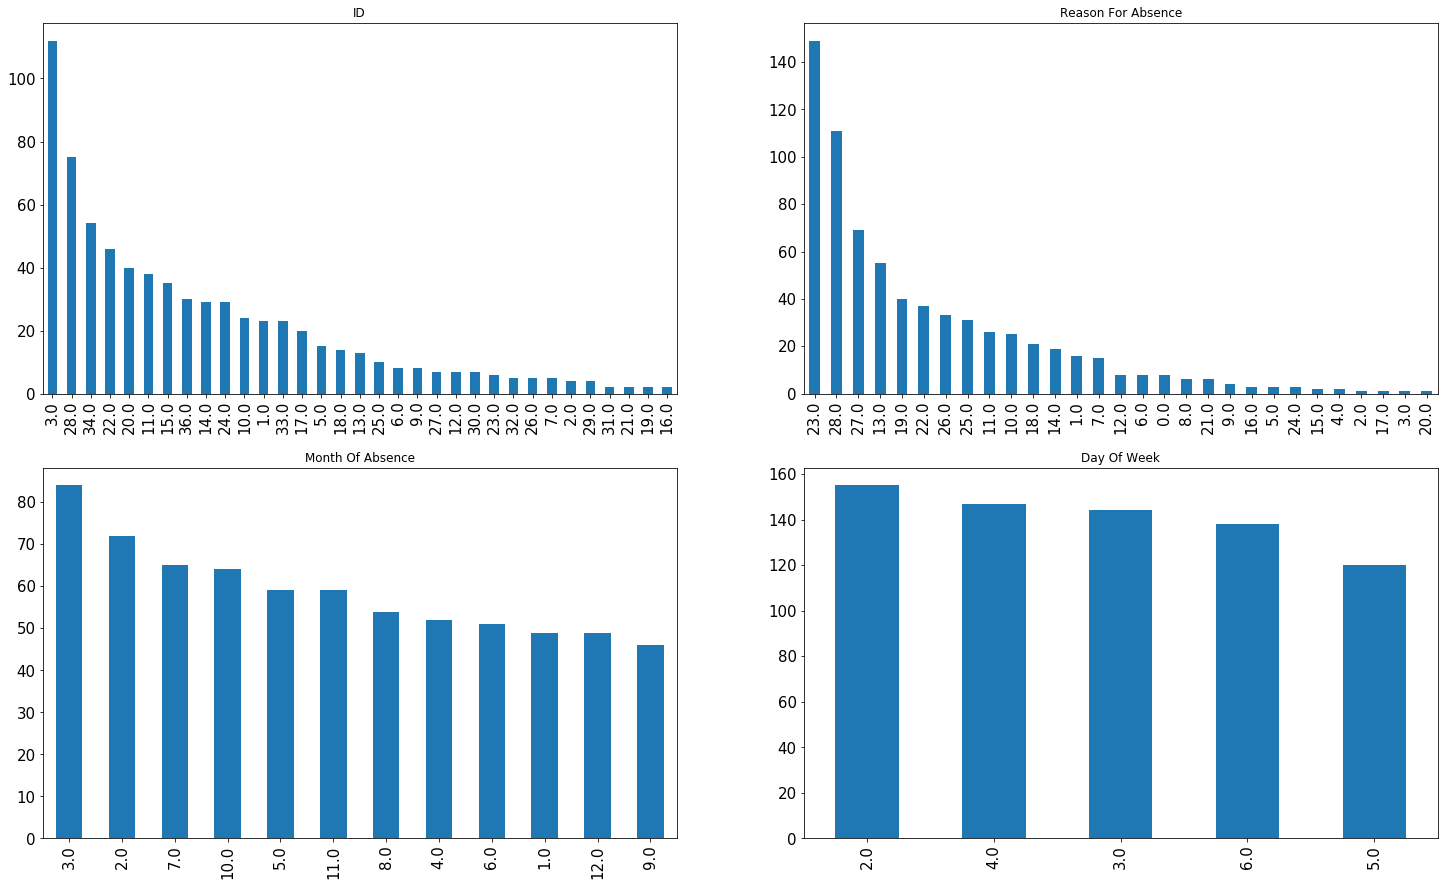

In [578]:
## Creating plots on categorial variables ##


## First set of plots ##

plt.figure(1)
plt.subplot(221)
data_record['ID'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'ID', fontsize = 15)

plt.subplot(222)
data_record['ReasonForAbsence'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Reason For Absence', fontsize = 15)

plt.subplot(223)
data_record['MonthOfAbsence'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Month Of Absence', fontsize = 15)

plt.subplot(224)
data_record['DayOfWeek'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Day Of Week', fontsize = 15)

plt.show()

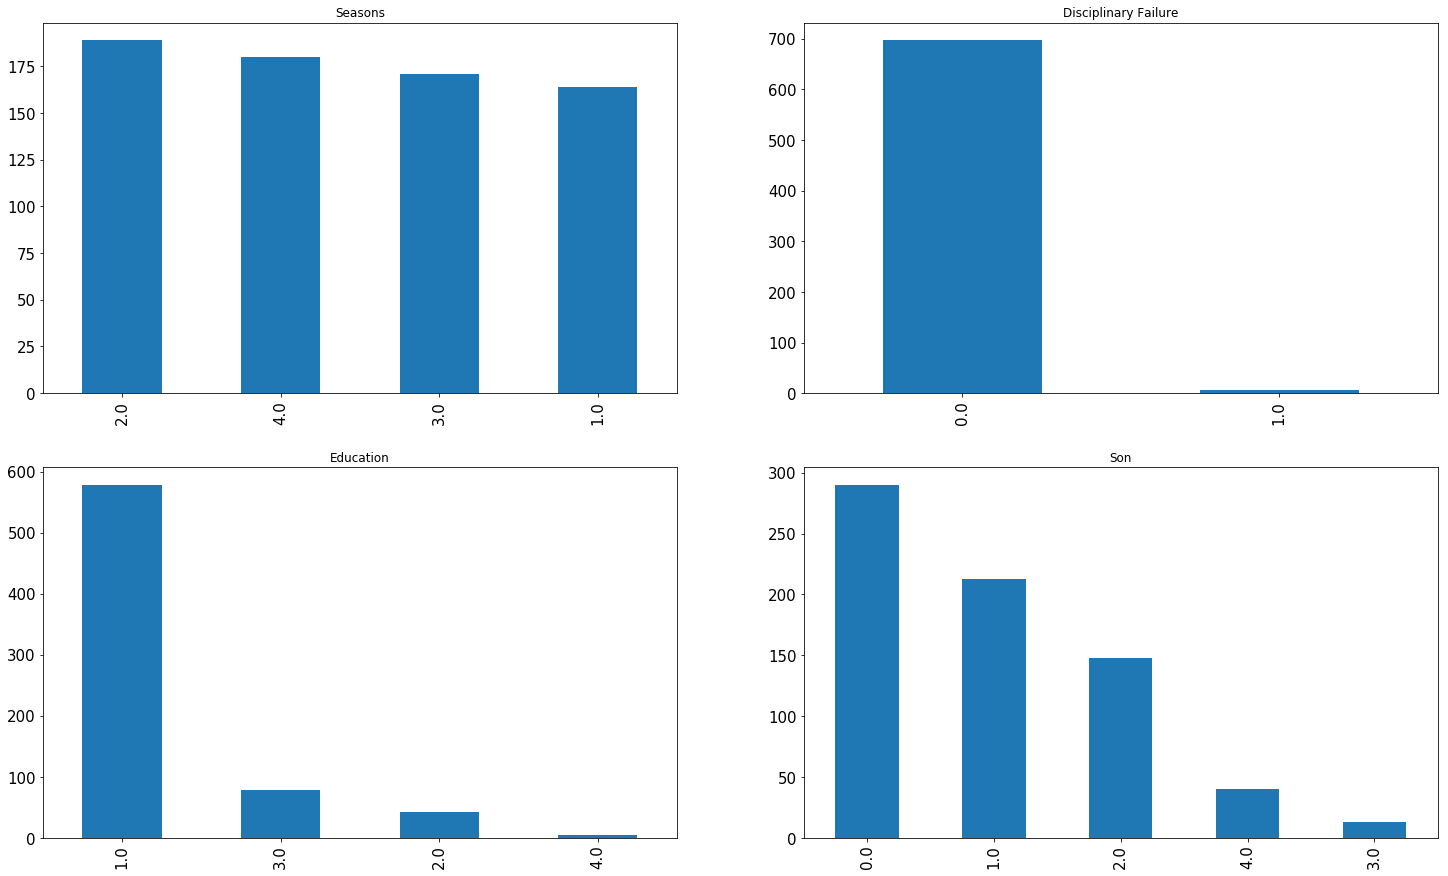

In [579]:
## Second set of plots ##

plt.figure(1)
plt.subplot(221)
data_record['Seasons'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Seasons', fontsize = 15)

plt.subplot(222)
data_record['DisciplinaryFailure'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Disciplinary Failure', fontsize = 15)

plt.subplot(223)
data_record['Education'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Education', fontsize = 15)

plt.subplot(224)
data_record['Son'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Son', fontsize = 15)

plt.show()

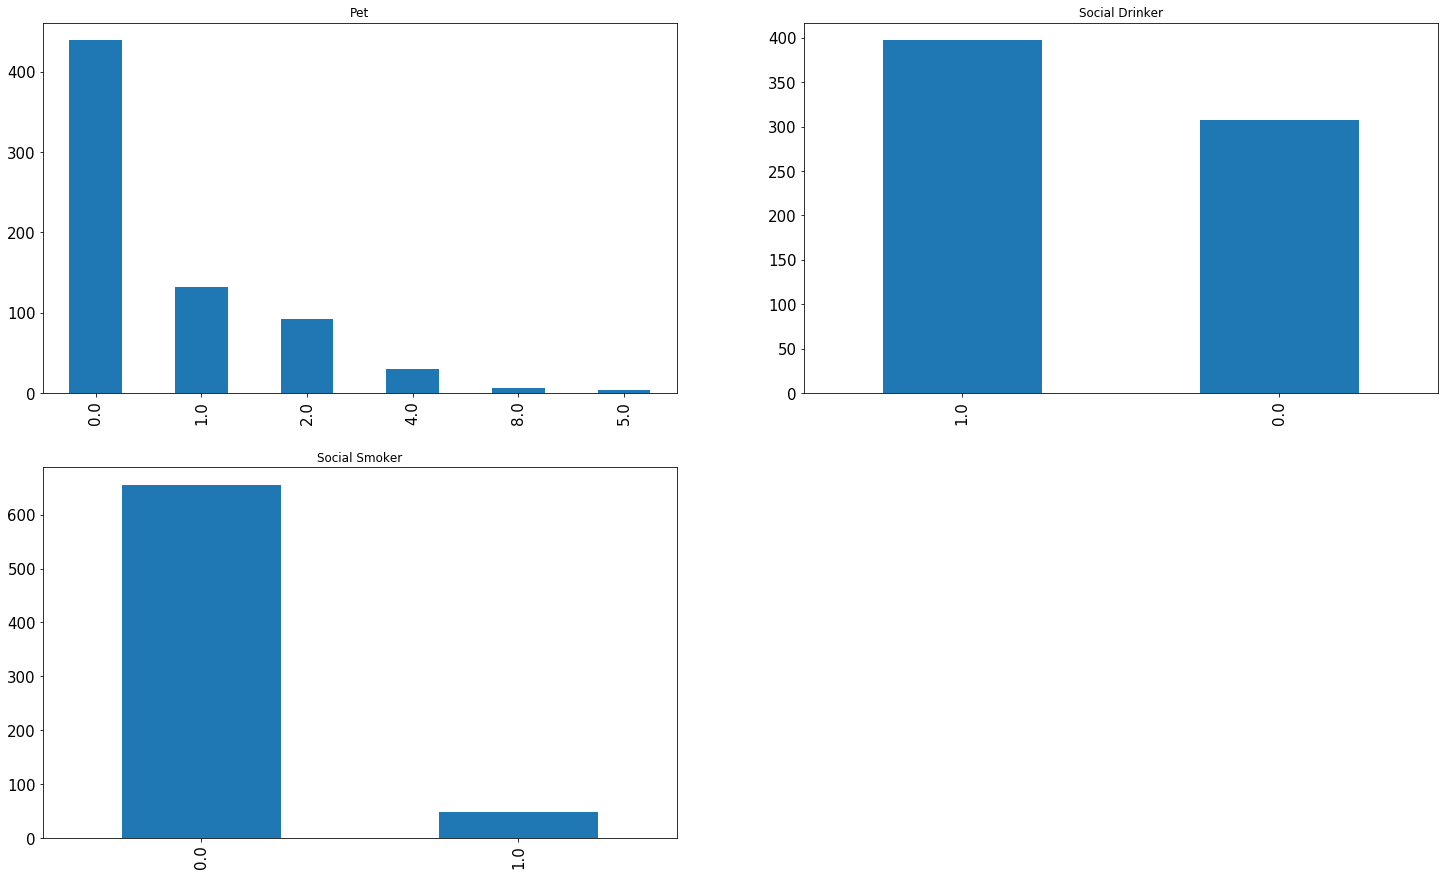

In [580]:
## Last set of plots ##

plt.figure(1)
plt.subplot(221)
data_record['Pet'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Pet', fontsize = 15)

plt.subplot(222)
data_record['SocialDrinker'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Social Drinker', fontsize = 15)

plt.subplot(223)
data_record['SocialSmoker'].value_counts(normalize=False).plot.bar(figsize = (25,15), title = 'Social Smoker', fontsize = 15)


In [ ]:
############################################## Primitive Conclusions ##############################################

## Employee with ID = 3 has the most entries for absenteeism.
## The top 5 reasons for absenteeism (in number of entries) are 23 (Medical Consultation), 28 (Dental Consultation),
## 27 (Physiotherapy), 13 (Musculoskeletal Diseases), and 19 (Injury, poisoning or other external causes).
## Most entries for absenteeism is in month number 3 (March).
## Most entries for absenteeism are for the second day of the week (Monday).
## Disciplinary Failures are rare.
## A sizeable number of employees don't have kids and/or pets.
## There is a moderate number of social drinkers and a miniscule number of social smokers.

In [ ]:
## Creating plots to show the relation between categorical variables and target variable ##

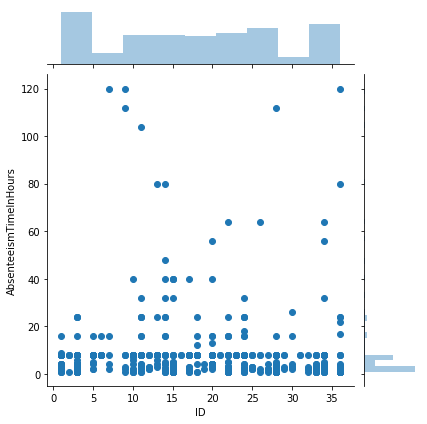

In [158]:
## Absenteeism Time In Hours by ID ##

sns.jointplot(x = 'ID', y = 'AbsenteeismTimeInHours', data = data_record)

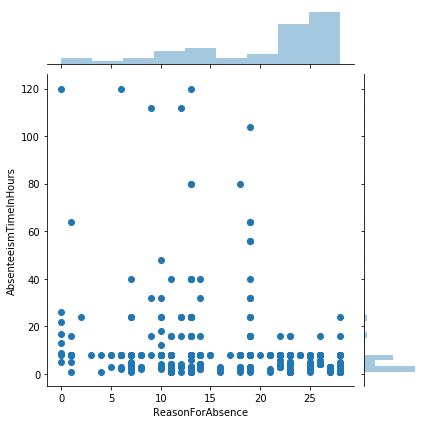

In [159]:
## Absenteeism Time In Hours by Reason For Absence ##

sns.jointplot(x = 'ReasonForAbsence', y = 'AbsenteeismTimeInHours', data = data_record)

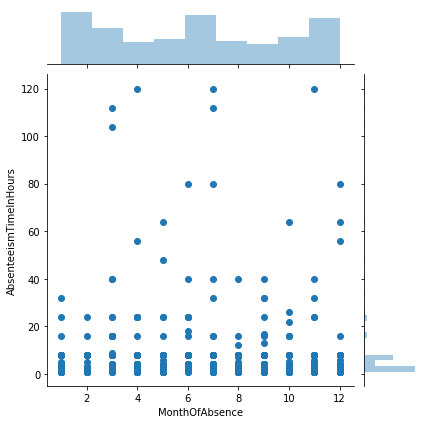

In [160]:
## Absenteeism Time In Hours by Month ##

sns.jointplot(x = 'MonthOfAbsence', y = 'AbsenteeismTimeInHours', data = data_record)

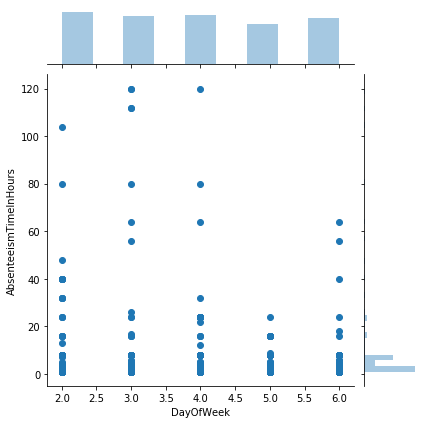

In [161]:
## Absenteeism Time In Hours by Day Of Week ##

sns.jointplot(x = 'DayOfWeek', y = 'AbsenteeismTimeInHours', data = data_record)

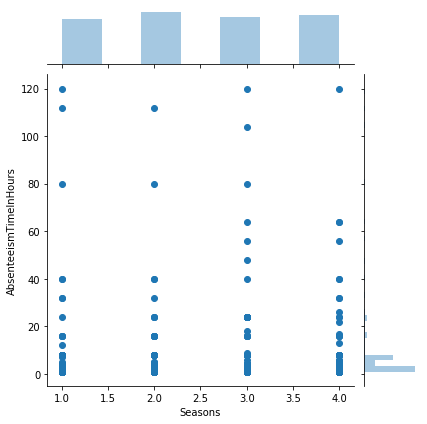

In [162]:
## Absenteeism Time In Hours by Season ##

sns.jointplot(x = 'Seasons', y = 'AbsenteeismTimeInHours', data = data_record)

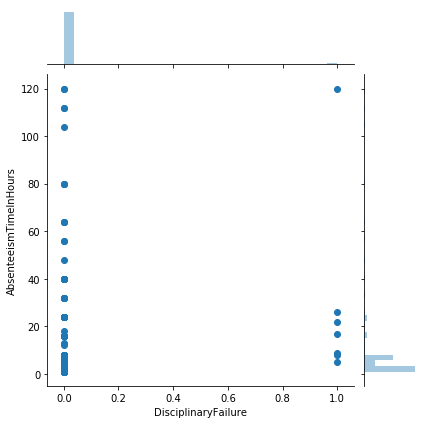

In [163]:
## Absenteeism Time In Hours by Discipline ##

sns.jointplot(x = 'DisciplinaryFailure', y = 'AbsenteeismTimeInHours', data = data_record)

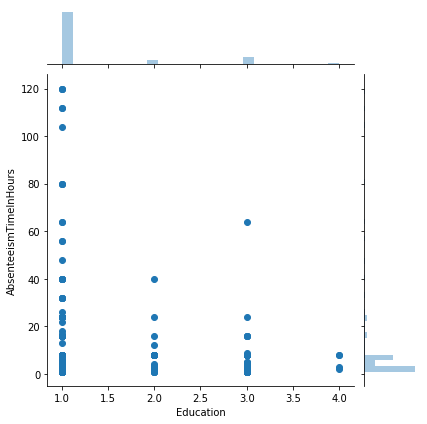

In [164]:
## Absenteeism Time In Hours by Education ##

sns.jointplot(x = 'Education', y = 'AbsenteeismTimeInHours', data = data_record)

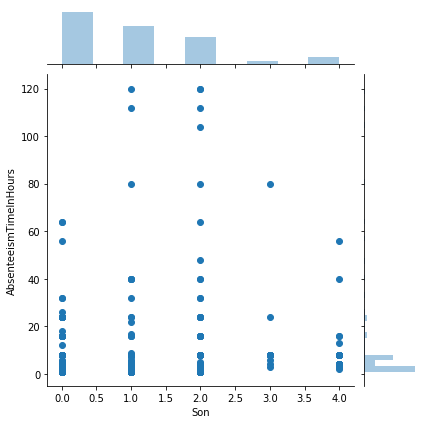

In [165]:
## Absenteeism Time In Hours by Number of Children ##

sns.jointplot(x = 'Son', y = 'AbsenteeismTimeInHours', data = data_record)

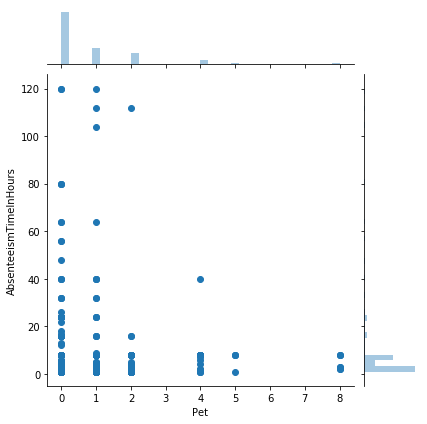

In [166]:
## Absenteeism Time In Hours by Number of Pets ##

sns.jointplot(x = 'Pet', y = 'AbsenteeismTimeInHours', data = data_record)

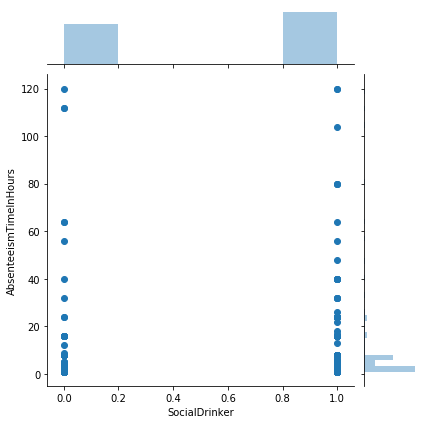

In [167]:
## Absenteeism Time In Hours by Social Drinking Habits ##

sns.jointplot(x = 'SocialDrinker', y = 'AbsenteeismTimeInHours', data = data_record)

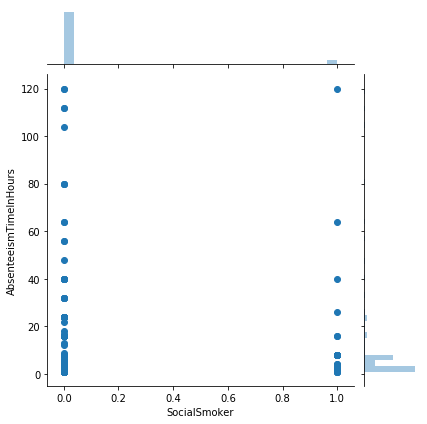

In [168]:
## Absenteeism Time In Hours by Social Smoking Habits ##

sns.jointplot(x = 'SocialSmoker', y = 'AbsenteeismTimeInHours', data = data_record)

In [ ]:
## Creating plots to show the relation between continuous variables and target variable ##

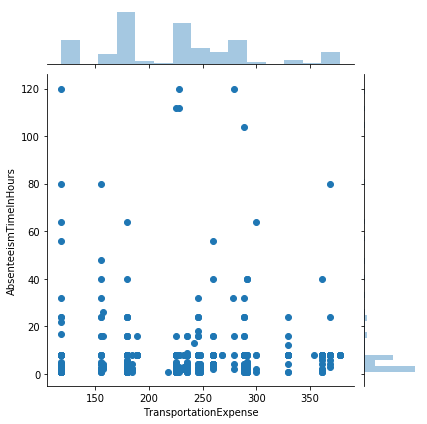

In [172]:
## Absenteeism Time In Hours by Transportation Expense ##

sns.jointplot(x = 'TransportationExpense', y = 'AbsenteeismTimeInHours', data = data_record)

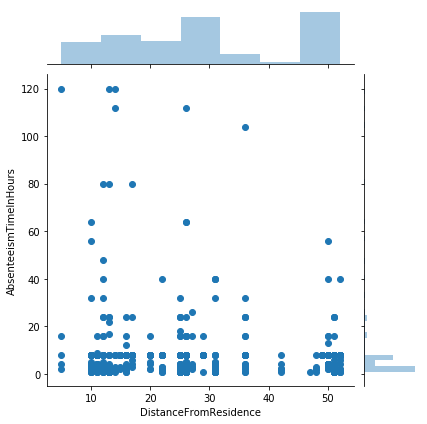

In [173]:
## Absenteeism Time In Hours by Distance From Residence ##

sns.jointplot(x = 'DistanceFromResidence', y = 'AbsenteeismTimeInHours', data = data_record)

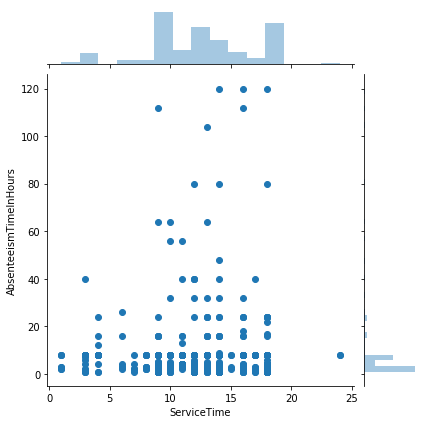

In [174]:
## Absenteeism Time In Hours by Service Time ##

sns.jointplot(x = 'ServiceTime', y = 'AbsenteeismTimeInHours', data = data_record)

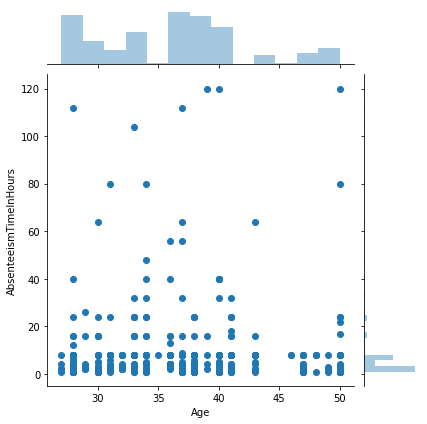

In [175]:
## Absenteeism Time In Hours by Age ##

sns.jointplot(x = 'Age', y = 'AbsenteeismTimeInHours', data = data_record)

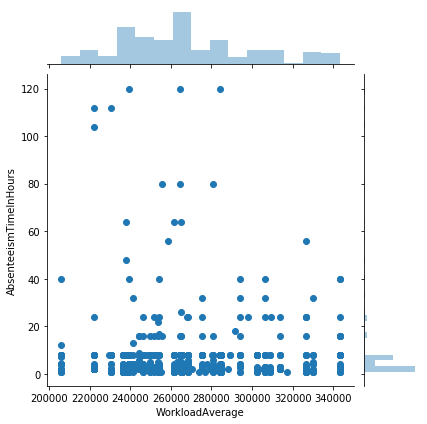

In [176]:
## Absenteeism Time In Hours by Work Load Average Per Day ##

sns.jointplot(x = 'WorkloadAverage', y = 'AbsenteeismTimeInHours', data = data_record)

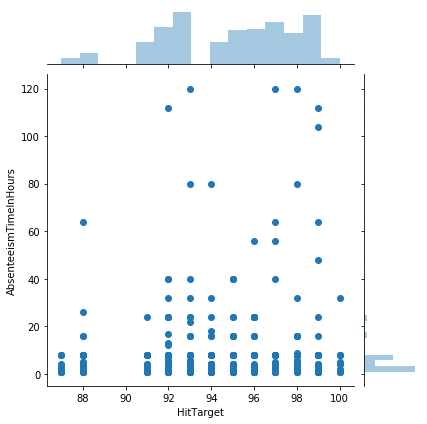

In [177]:
## Absenteeism Time In Hours by Hit Target ##

sns.jointplot(x = 'HitTarget', y = 'AbsenteeismTimeInHours', data = data_record)

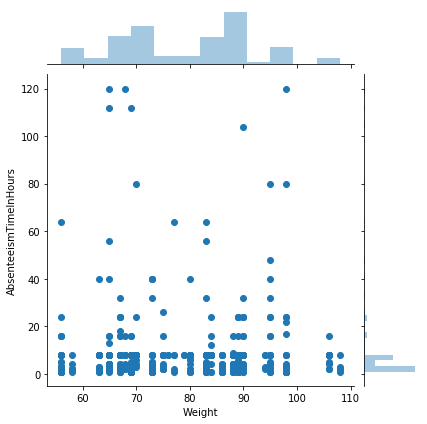

In [178]:
## Absenteeism Time In Hours by Weight ##

sns.jointplot(x = 'Weight', y = 'AbsenteeismTimeInHours', data = data_record)

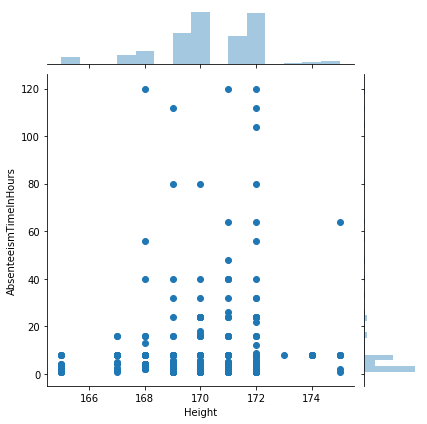

In [179]:
## Absenteeism Time In Hours by Height ##

sns.jointplot(x = 'Height', y = 'AbsenteeismTimeInHours', data = data_record)

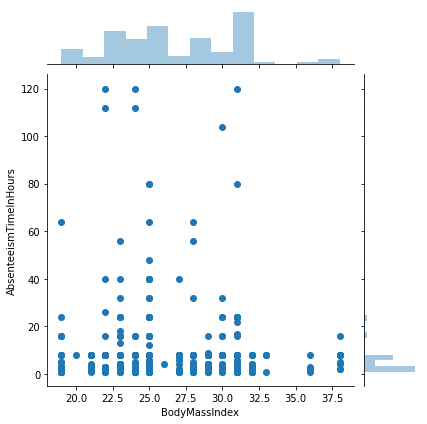

In [180]:
## Absenteeism Time In Hours by Body Mass Index ##

sns.jointplot(x = 'BodyMassIndex', y = 'AbsenteeismTimeInHours', data = data_record)

In [ ]:
############################################## Informed Conclusions ##############################################

## 1. The company lost most hours to absenteeism due to employees having Physiotherapy and Medical Consultations.

## 2. The company lost most hours to absenteeism in the months of February, July and December, which corresponds to
##    the mid of Season 2, the mid of Season 1 and the beginning of Season 2 / end of season 4, respectively.

## 3. The company lost significant hours to absenteeism from employees who have residences farthest from work.

## 4. The company lost significant hours to absenteeism from employees who are nearing 10 or 20 years of service.

## 5. The company lost most hours to absenteeism from employees in the 36-42 age group,
##    and lost significant hours to absenteeism from employees in the 28-29 age group.

## 6. The company lost most hours to absenteeism from employees with average daily workload of 270000 units,
##    and lost significant hours to absenteeism from employees with average daily workload of 240000 units.

## 7. The company lost most hours to absenteeism from employees who hit a target of 93%,
##    and lost significant hours to absenteeism from employees who hit the target range of 96-99%.

# **Feature Selection**

In [21]:
## Creating a variable for correlation plot for the continuous variables ##

dataCorr = data_record.loc[:,contin_var]

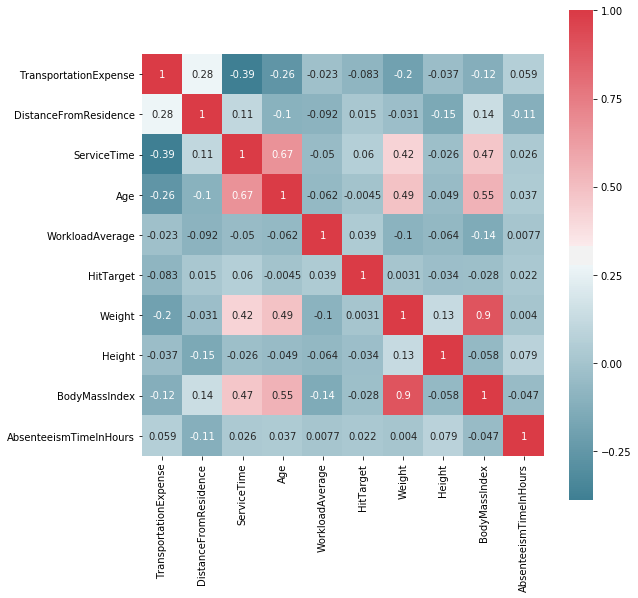

In [23]:
##Creating the correlation matrix ##

f, ax = plt.subplots(figsize=(9,9))                               ## Setting up the matrix size

correlation = dataCorr.corr()                                       ## Generating the matrix

sns.heatmap(correlation,
            mask=np.zeros_like(correlation, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax,
            annot = True)                                           ## Using the seaborn heatmap to plot the matrix

In [ ]:
#### Observation : Weight is highly positively related to BodyMassIndex

#### Action : Dropping the BodyMassIndex column (since BodyMassIndex is the derived variable)

In [24]:
## Dropping the variable BodyMassIndex ##

data_record = data_record.drop(['BodyMassIndex'], axis = 1)

In [25]:
## Updating the list of continuous variables ##

contin_var.remove('BodyMassIndex')

In [26]:
## Performing the ANOVA test for the categorical variables ##

## Loading requisite libraries ##

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy import stats

In [27]:
## Working the ANOVA test ##

anovaFormula = 'AbsenteeismTimeInHours ~ C(ReasonForAbsence)+C(MonthOfAbsence)+C(DayOfWeek)+C(Seasons)+C(DisciplinaryFailure)+C(Education)+C(Son)+C(Pet)+C(SocialDrinker)+C(SocialSmoker)'
                                                                  ## Defining the formula

anovaModel = ols(anovaFormula, data = data_record).fit()          ## Forming the model

anovaTable = anova_lm(anovaModel, typ = 2)                        ## Creating the table

In [28]:
## Viewing the resultant table ##

anovaTable

,sum_sq,df,F,PR(>F)
C(ReasonForAbsence),22082.953857,30.0,4.970262,1.430635e-15
C(MonthOfAbsence),1653.631598,12.0,0.930467,5.156548e-01
C(DayOfWeek),1034.759371,4.0,1.746718,1.380505e-01
C(Seasons),208.892301,3.0,0.470159,7.031886e-01
C(DisciplinaryFailure),316.332114,2.0,1.067964,3.443300e-01
C(Education),937.917669,8.0,0.791622,6.101744e-01
C(Son),1567.742048,7.0,1.512237,1.600206e-01
C(Pet),869.366646,6.0,0.978352,4.388902e-01
C(SocialDrinker),475.033311,3.0,1.069168,3.615320e-01
C(SocialSmoker),13.718463,1.0,0.092629,7.609613e-01


In [ ]:
#### Observation : All columns except ReasonForAbsence have p-values more than 0.05.

#### Action : Dropping all columns except ReasonForAbsence.

In [227]:
## Dropping all categorical variables except ReasonForAbsence ##

data_record = data_record.drop(['MonthOfAbsence','DayOfWeek','Seasons','DisciplinaryFailure','Education','Son','Pet','SocialDrinker','SocialSmoker'], axis = 1)

# **Feature Scaling**

In [228]:
## Creating a duplicate dataset for further operations ##

duplicate_record = data_record.copy()

In [230]:
## Normalizing the continuous variables ##

for i in contin_var :
    print(i)
    duplicate_record[i] = (duplicate_record[i] - min(duplicate_record[i]))/(max(duplicate_record[i] - min(duplicate_record[i])))

TransportationExpense
DistanceFromResidence
ServiceTime
Age
WorkloadAverage
HitTarget
Weight
Height
AbsenteeismTimeInHours


In [231]:
## Taking a look at the now normalised dataset ##

duplicate_record.head(10)

,ID,ReasonForAbsence,TransportationExpense,DistanceFromResidence,ServiceTime,Age,WorkloadAverage,HitTarget,Weight,Height,AbsenteeismTimeInHours
0,11.0,26.0,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.025210
1,3.0,23.0,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.008403
2,7.0,7.0,0.619231,0.000000,0.565217,0.521739,0.244925,0.769231,0.230769,0.3,0.025210
3,11.0,23.0,0.657692,0.659574,0.521739,0.260870,0.244925,0.769231,0.653846,0.7,0.008403
4,3.0,23.0,0.234615,0.978723,0.739130,0.478261,0.244925,0.769231,0.634615,0.5,0.008403
5,10.0,22.0,0.907692,1.000000,0.086957,0.043478,0.244925,0.769231,0.461538,0.7,0.058824
6,20.0,23.0,0.546154,0.957447,0.434783,0.391304,0.244925,0.769231,0.173077,0.3,0.025210
7,14.0,19.0,0.142308,0.148936,0.565217,0.304348,0.244925,0.769231,0.750000,0.4,0.327731
8,1.0,22.0,0.450000,0.127660,0.565217,0.434783,0.244925,0.769231,0.615385,0.7,0.058824
9,20.0,1.0,0.546154,0.957447,0.434783,0.391304,0.244925,0.769231,0.173077,0.3,0.058824


# **Future Forecast**

In [ ]:
#### The problem statement states that the company XYZ demands predictions 
#### for absenteeism time in hours for the next 12 months (the year of 2011)

#### The predictions can be made by utilising the existing data of 
#### absenteeism hours accumulated in each month

In [449]:
## Aggregating absenteeism hours by month ##

monthlyAbsence = absentData.groupby('MonthOfAbsence')['AbsenteeismTimeInHours'].sum()     ## Utilising the duplicate dataset created after outlier analysis

## Viewing the statistic ##

monthlyAbsence

MonthOfAbsence
1.0     222.0
2.0     294.0
3.0     774.0
4.0     482.0
5.0     406.0
6.0     421.0
7.0     730.0
8.0     286.0
9.0     318.0
10.0    398.0
11.0    482.0
12.0    388.0
Name: AbsenteeismTimeInHours, dtype: float64

In [364]:
#### For making predictions of absenteeism for the next year (2011),
#### data of more than one year is required to get more refined predictions.

#### Therefore, it will be in our interest to assume that the existing data
#### is of the last two years (since the timeframe of the existing data is unclear,
#### and the bigger timeframe we have, the better the predictions will be)

In [450]:
## Furnishing the data of monthly absenteeism ##

monthlyAbsence = monthlyAbsence.reset_index()
monthlyAbsence['MonthOfAbsence'] = monthlyAbsence['MonthOfAbsence'].astype('int')


In [451]:
## Changing the index ##

monthlyAbsence = monthlyAbsence.set_index('MonthOfAbsence')

## Viewing the data ##

monthlyAbsence

,AbsenteeismTimeInHours
MonthOfAbsence,
1,222.0
2,294.0
3,774.0
4,482.0
5,406.0
6,421.0
7,730.0
8,286.0
9,318.0


In [452]:
## Changing the absenteeism hours into half, because of the assumption that
## the existing data is in the timeframe of two years

## Creating a column for absenteeism hours in each month of the year ##

monthlyAbsence['AbsenteeismHoursInMonth'] = monthlyAbsence['AbsenteeismTimeInHours']/2

## Viewing the data ##

monthlyAbsence

,AbsenteeismTimeInHours,AbsenteeismHoursInMonth
MonthOfAbsence,,
1,222.0,111.0
2,294.0,147.0
3,774.0,387.0
4,482.0,241.0
5,406.0,203.0
6,421.0,210.5
7,730.0,365.0
8,286.0,143.0
9,318.0,159.0


In [453]:
## Dropping the AbsenteeismTimeInHours column, since we need AbsenteeismHoursInMonth to make predictions ##

monthlyAbsence = monthlyAbsence.drop(['AbsenteeismTimeInHours'], axis = 1)

## Viewing the data ##

monthlyAbsence

,AbsenteeismHoursInMonth
MonthOfAbsence,
1,111.0
2,147.0
3,387.0
4,241.0
5,203.0
6,210.5
7,365.0
8,143.0
9,159.0


In [454]:
## Starting work over the time series ##

timeSeries = monthlyAbsence['AbsenteeismHoursInMonth']

## Viewing the data ##

timeSeries

MonthOfAbsence
1     111.0
2     147.0
3     387.0
4     241.0
5     203.0
6     210.5
7     365.0
8     143.0
9     159.0
10    199.0
11    241.0
12    194.0
Name: AbsenteeismHoursInMonth, dtype: float64

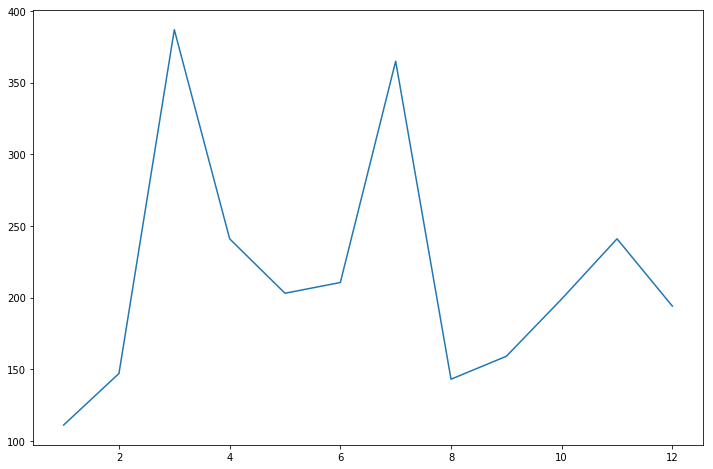

In [455]:
## Plotting a simple graph for the timeSeries variable ##

plt.figure(1)
plt.plot(timeSeries)

plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(12)

**Augmented Dickey-Fuller Test**  (To Check For Stationarity Of The Series)

In [456]:
## Loading the requisite library ##

from statsmodels.tsa.stattools import adfuller

## Performing the Augmented DIckey-Fuller Test on the time-series data ##

seriesTest = adfuller(timeSeries, autolag='AIC')

## Printing the results from the test ##

print('ADF Statistic: %f' % seriesTest[0])                    ## The test statistic
print('p-value: %f' % seriesTest[1])                          ## The p-value
print('Critical Values:')                                     ## The critical values (at 1%, 5%, and 10%)
for key, value in seriesTest[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.000000
p-value: 0.958532
Critical Values:
	1%: -10.417
	5%: -5.778
	10%: -3.392


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
#### Observation : Here, Test statistic is greater than the critical values for 1%, 5% and 10%.

#### Conclusion : The Time Series 'timeSeries' is not stationary.

#### Action : Get the first difference.

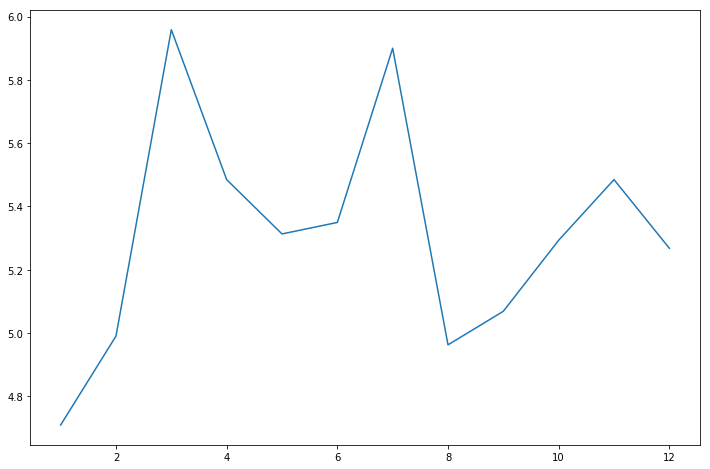

In [457]:
## Getting the log values of the time series data ##

timeSeries_log = np.log(timeSeries)

## Plotting the graph for the log data ##

plt.figure(1)
plt.plot(timeSeries_log)

plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(12)

In [458]:
## Acquiring the difference in log values (by month) ##

timeSeries_log_diff = timeSeries_log - timeSeries_log.shift()

## Viewing the result ##

timeSeries_log_diff                           ## First Difference

MonthOfAbsence
1          NaN
2     0.280902
3     0.967992
4    -0.473628
5    -0.171591
6     0.036280
7     0.550412
8    -0.937053
9     0.106060
10    0.224401
11    0.191492
12   -0.216939
Name: AbsenteeismHoursInMonth, dtype: float64

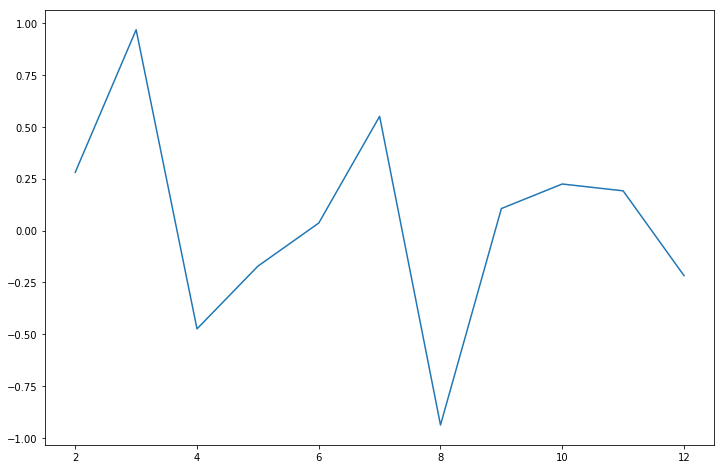

In [459]:
## Plotting the graph for the log difference values ##

plt.figure(1)
plt.plot(timeSeries_log_diff)

plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(12)

In [460]:
## Replacing the initial NaN value with zero ##

timeSeries_log_diff.fillna(0,inplace = True)

In [461]:
## Performing the Augmented Dickey-Fuller Test again to check for stationarity ##

seriesDiffTest = adfuller(timeSeries_log_diff)

## Printing the results from the test ##

print('ADF Statistic: %f' % seriesDiffTest[0])                    ## The test statistic
print('p-value: %f' % seriesDiffTest[1])                          ## The p-value
print('Critical Values:')                                     ## The critical values (at 1%, 5%, and 10%)
for key, value in seriesDiffTest[4].items():
	print('At %s: %.3f' % (key, value))

ADF Statistic: -1.714740
p-value: 0.423534
Critical Values:
At 1%: -4.665
At 5%: -3.367
At 10%: -2.803


In [ ]:
#### Observation : Here, Test statistic is greater than the critical values for 1%, 5% and 10%.

#### Conclusion : The Time Series 'timeSeries_log_diff' is not stationary.

#### Action : Get the second difference.

In [462]:
## Acquiring the difference in log values again ##

timeSeries_log_sec_diff = timeSeries_log_diff - timeSeries_log_diff.shift()

timeSeries_log_sec_diff                                        ## Second Difference

MonthOfAbsence
1          NaN
2     0.280902
3     0.687090
4    -1.441620
5     0.302037
6     0.207871
7     0.514132
8    -1.487464
9     1.043112
10    0.118341
11   -0.032909
12   -0.408431
Name: AbsenteeismHoursInMonth, dtype: float64

In [463]:
## Replacing the initial NaN value with zero ##

timeSeries_log_sec_diff.fillna(0,inplace = True)

In [464]:
## Performing the Augmented Dickey-Fuller Test again to check for stationarity ##

seriesDiffTest = adfuller(timeSeries_log_sec_diff)

## Printing the results from the test ##

print('ADF Statistic: %f' % seriesDiffTest[0])                    ## The test statistic
print('p-value: %f' % seriesDiffTest[1])                          ## The p-value
print('Critical Values:')                                     ## The critical values (at 1%, 5%, and 10%)
for key, value in seriesDiffTest[4].items():
	print('At %s: %.3f' % (key, value))

ADF Statistic: -3.619407
p-value: 0.005401
Critical Values:
At 1%: -4.332
At 5%: -3.233
At 10%: -2.749


In [384]:
#### Observation : Here, Test statistic (-3.619) is less than the critical value for 10% (-2.749).

#### Conclusion : The Time Series 'timeSeries_log_sec_diff' is stationary.

#### Action : Proceed with Autocorrelation Function.

**Autocorrelation Function**

In [469]:
## Loading the requisite library ##

from statsmodels.tsa.stattools import acf, pacf

## Running the Autocorrelation and Partial Autocorrelation Functions ##

lagACF = acf(timeSeries_log_sec_diff, nlags = 10)
lagPACF = pacf(timeSeries_log_sec_diff, nlags = 10, method = 'ols')

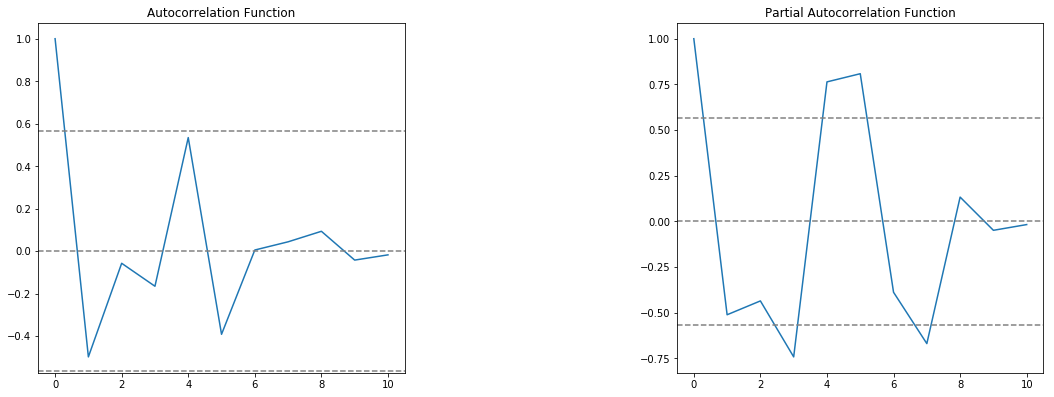

In [470]:
## Plotting the graphs for both ACF and PACF ##

plt.figure(1)

plt.subplot(121)
plt.plot(lagACF)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeSeries_log_sec_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(timeSeries_log_sec_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lagPACF)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeSeries_log_sec_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(timeSeries_log_sec_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout(pad = 4.0)
plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(20)

In [ ]:
#### Observation : The plots above don't give any clear values of p and q. We will take ARIMA(0,0,0) model as the initial candidate.

#### Action : Fit an ARIMA(0,0,0) model with following variations -
####          ARIMA(1,0,0)
####          ARIMA(0,1,0)
####          ARIMA(2,0,0)
####          ARIMA(0,2,0).

In [488]:
## Loading the requisite library for ARIMA ##
from statsmodels.tsa.arima_model import ARIMA

## Fitting the model, getting the results, and extracting the RSS value from the model ##

## For ARIMA(0,0,0) ##

model = ARIMA(timeSeries_log_sec_diff, order = (0,0,0))
results_AR = model.fit(disp=-1)
RSS = (results_AR.fittedvalues - timeSeries_log_sec_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


6.506649606527966

**ARIMA Modelling**

In [489]:
## For ARIMA(1,0,0) ##

model = ARIMA(timeSeries_log_sec_diff, order = (1,0,0))
results_AR = model.fit(disp=-1)
RSS = (results_AR.fittedvalues - timeSeries_log_sec_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


4.857323920198402

In [490]:
## For ARIMA(2,0,0) ##

model = ARIMA(timeSeries_log_sec_diff, order = (2,0,0))
results_AR = model.fit(disp=-1)
RSS = (results_AR.fittedvalues - timeSeries_log_sec_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


3.9744628658356462

In [512]:
## For ARIMA(0,1,0) ##

model = ARIMA(timeSeries_log_sec_diff, order = (0,1,0))
results_AR = model.fit(disp=-1)
RSS = (results_AR.fittedvalues - timeSeries_log_sec_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


6.509626639109682

In [513]:
## For ARIMA(0,2,0) ##

model = ARIMA(timeSeries_log_sec_diff, order = (0,2,0))
results_AR = model.fit(disp=-1)
RSS = (results_AR.fittedvalues - timeSeries_log_sec_diff)**2
RSS.fillna(0,inplace=True)
sum(RSS)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


6.409395619300855

In [ ]:
## RSS value at (0,0,0) = 6.5066
## RSS value at (1,0,0) = 4.8573
## RSS value at (2,0,0) = 3.9745
## RSS value at (0,1,0) = 6.5096
## RSS value at (0,2,0) = 6.4094

In [ ]:
#### Observation : The ARIMA(2,0,0) model gives the lowest RSS value of 3.9745.

#### Action : Proceeding with ARIMA(2,0,0) model for the forecast.

In [514]:
## For ARIMA(2,0,0)

modelChosen = ARIMA(timeSeries_log_sec_diff, order = (2,0,0))
results_AR_Chosen = modelChosen.fit(disp=-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [515]:
## Taking a look at the fitted values ##

results_AR_Chosen.fittedvalues

MonthOfAbsence
1    -0.004930
2    -0.007366
3    -0.201810
4    -0.585746
5     0.712079
6     0.331982
7    -0.266841
8    -0.439976
9     0.809127
10   -0.156175
11   -0.487572
12   -0.032718
dtype: float64

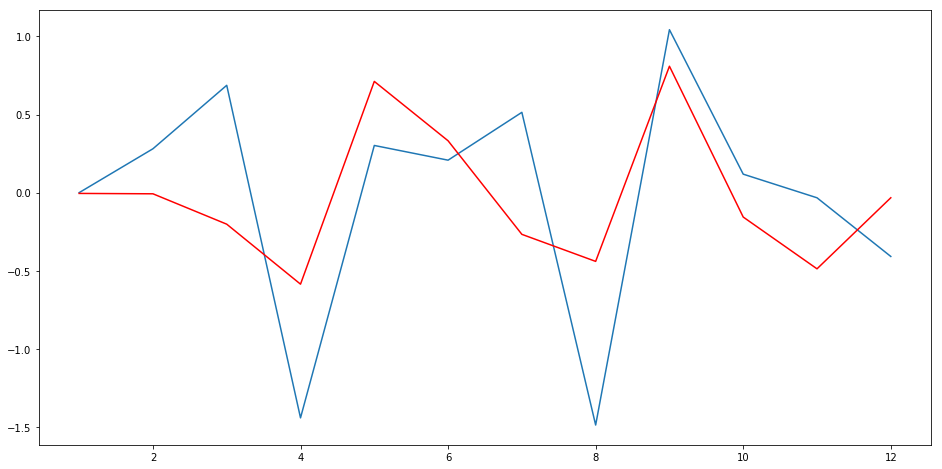

In [554]:
## Plotting the fitted values and the second difference together ##

plt.figure(1)
plt.plot(timeSeries_log_sec_diff)
plt.plot(results_AR_Chosen.fittedvalues, color='red')

plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(16)

In [547]:
## Running the predictions ##

pred_AR = results_AR_Chosen.predict(start = 12, end = 24)

## Viewing the sequence ##
pred_AR

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


12    0.280994
13   -0.046557
14   -0.085259
15    0.065704
16   -0.022571
17   -0.019754
18    0.011893
19   -0.010769
20   -0.007343
21   -0.001063
22   -0.006650
23   -0.005226
24   -0.004073
dtype: float64

In [548]:
## Removing the first element of the series (because it's from the existing data) ##

pred_AR = pred_AR[1:]

In [549]:
## Getting the cumulative sum of the series ##

pred_AR_cumsum = pred_AR.cumsum()
pred_AR_cumsum

13   -0.046557
14   -0.131816
15   -0.066112
16   -0.088683
17   -0.108437
18   -0.096544
19   -0.107313
20   -0.114656
21   -0.115718
22   -0.122368
23   -0.127594
24   -0.131667
dtype: float64

In [550]:
## Getting the average of the log of the original time series to establish a baseline ##

sum(timeSeries_log)/12

5.315290179176404

In [551]:
## Creating a log series for predictions with the baseline and adding 
## the series of cumulative sums to get the predicted log values 

pred_log = pd.Series(5.3, index = range(13,25))
pred_log = pred_log.add(pred_AR_cumsum,fill_value = 0)
pred_log

13    5.253443
14    5.168184
15    5.233888
16    5.211317
17    5.191563
18    5.203456
19    5.192687
20    5.185344
21    5.184282
22    5.177632
23    5.172406
24    5.168333
dtype: float64

In [552]:
## Calculating the exponential to get the predicted time series ##

pred_ARIMA = np.exp(pred_log)
pred_ARIMA

13    191.223565
14    175.595689
15    187.520522
16    183.335351
17    179.749326
18    181.899820
19    179.951430
20    178.634953
21    178.445244
22    177.262509
23    176.338517
24    175.621780
dtype: float64

In [553]:
## Rounding off to one decimal place for ease ##

pred_ARIMA = pred_ARIMA.round(1)
pred_ARIMA

13    191.2
14    175.6
15    187.5
16    183.3
17    179.7
18    181.9
19    180.0
20    178.6
21    178.4
22    177.3
23    176.3
24    175.6
dtype: float64

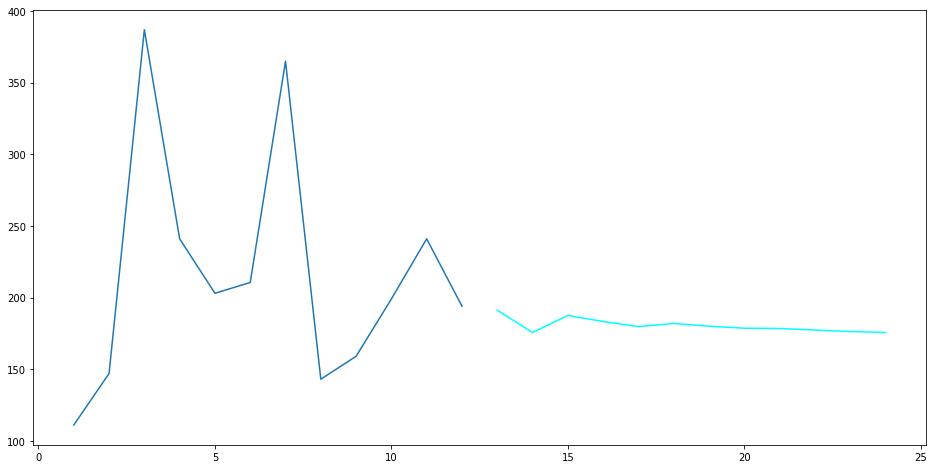

In [557]:
## Plotting the predicted time series (Absenteeism In Hours Per Month) alongside existing data ##

plt.figure(1)
plt.plot(timeSeries)
plt.plot(pred_ARIMA,color='cyan')

plt.figure(1).set_figheight(8)
plt.figure(1).set_figwidth(16)

In [ ]:
#### The predictions appear to be lacking the irregularity of the existing data,
#### but that's because of the assumption that the existing data is of the past two years
#### (2009 and 2010). Had there been a longer timeframe of the data, the irregularity
#### would have been much lower. Not to forget that the data was simply halved instead
#### of having separate observations for the two years in question.